In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import json
import glob
import sys
sys.path.append("..")

def load_from_json(filename):
    with open(filename, mode="r") as f:
        load_dict = json.load(fp=f)

    return load_dict

plot_metric = "BER"

# plt.rcParams.update({'font.size': 22})
subplot_fontsize = 16
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.15)

<Figure size 432x288 with 0 Axes>

../pack1123/awgn_wide_maml_15ts_5cls*json
../pack0shot/awgn_wide_maml_0shot_15ts_5cls*.json
[0.012693333333333333, 0.44301333333333326]
../pack1123/awgn_wide_maml_fo_15ts_5cls*json
../pack0shot/awgn_wide_maml_fo_0shot_15ts_5cls*.json
[0.019200000000000002, 0.48389333333333334]
../pack1123/awgn_wide_reptile_15ts_5cls*json
../pack0shot/awgn_wide_reptile_0shot_15ts_5cls*.json
[0.0664, 0.19760000000000003]
../pack1123/awgn_wide_cavia_15ts_5cls*json
../pack0shot/awgn_wide_cavia_0shot_15ts_5cls*.json
[0.019546666666666667, 0.5443733333333334]
../pack1123/awgn_wide_anil_15ts_5cls*json
../pack0shot/awgn_wide_anil_0shot_15ts_5cls*.json
[0.02456, 0.4928]
../pack1123/awgn_wide_kfo_15ts_5cls*json
../pack0shot/awgn_wide_kfo_0shot_15ts_5cls*.json
[0.020746666666666663, 0.4991999999999999]
here
../pack1123/awgn_wide_boil_15ts_5cls*json
../pack0shot/awgn_wide_boil_15ts_5cls*.json
[0.029413333333333333, 0.4542399999999999]
../pack1123/awgn_wide_metasgd_15ts_5cls*json
../pack0shot/awgn_wide_metasgd_0sho

<Figure size 1980x1500 with 0 Axes>

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


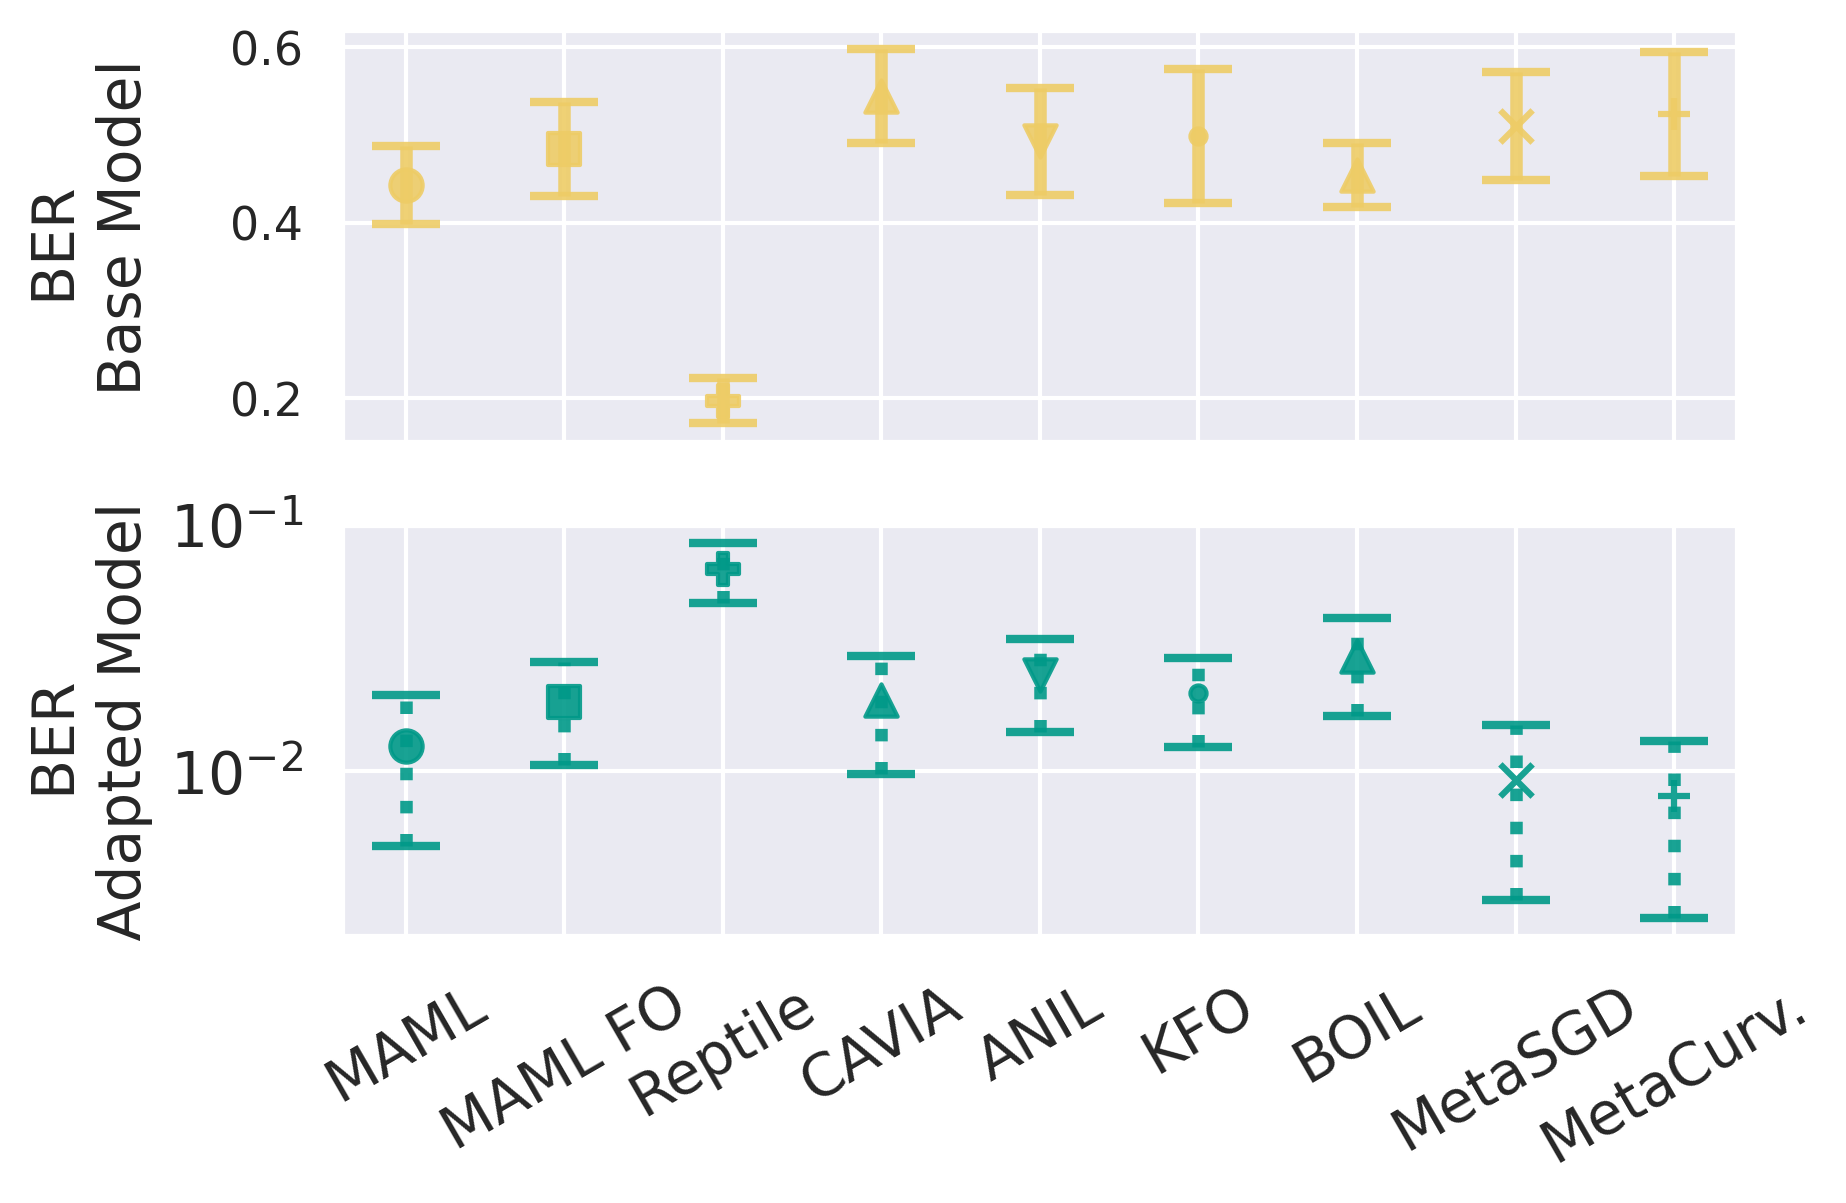

In [4]:
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.8)
import matplotlib.pyplot as plt
debug=False
plt.style.use(['ieee'])


# ax = plt.gca()
# ax.set_axisbelow(True)

fig,(ax1,ax2) = plt.subplots(2, 1,sharex=True, figsize=(6,4))
fig.set_dpi(300)
axes = [ax1,ax2]


for ax in ax1, ax2:
    ax.grid(True)
linestyles = ["dotted","solid", "-"]

learners = ["MAML", "MAML_FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", "MetaSGD", "MetaCurvature",]   

labels = ["MAML", "MAML FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", "MetaSGD", "MetaCurv.",]   
targ_channel = "awgn"

y_min, y_max = 0.0008, 0.3

channel_hardness = ["awgn"]

offsets = np.arange(-0.3,0.6,0.1)
snr_list_awgn =  np.arange(-10,11,1)
snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
snr_list_mem = np.arange(0.1, 1, 0.1)
snr_list_mp = np.arange(0.1, 1, 0.1)

markers = ["o",  "s", "P","^","v", ".", "^", "x", "+", "*", "D", "o",  "s", "P","^","x", "+", "*", "D", "o", ]

col2 = "#009988"
col1= "#EECC66"#"#DDDDDD"

for i, learner in enumerate(learners):
    all_v = []
    all_std = []
    
    if learner.lower() == "boil":
        print("here")
        run_names = [
    "../pack1123/awgn_wide_" +learner.lower()+ "_15ts_5cls"+ "*json",
    "../pack0shot/awgn_wide_" +learner.lower()+ "_15ts_5cls*.json"]
    else: 
        run_names = [
    "../pack1123/awgn_wide_" +learner.lower()+ "_15ts_5cls"+ "*json",
    "../pack0shot/awgn_wide_" +learner.lower()+ "_0shot_15ts_5cls*.json"]

    for j, run_name in enumerate(run_names):
        print(run_name)

        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name[0], type(run_name))
        data = load_from_json(run_name[0])


        if debug: print( data["iter"], run_name)
        value = data['val_ber_list']

        if learner is "test" or "boil":
            ep_id = -1
        else: 
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0] 
        if debug: print("value shape", np.shape(value), np.mean(value), " ep id ", ep_id)


        if targ_channel == "awgn":
            if debug: print(len(value))
            value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list_awgn), -1)
            v_id = 10

        elif targ_channel == "bursty":
            value = np.asarray(value[ep_id][1950:]).reshape(len(snr_list_bursty), -1)
            v_id = 4

        elif targ_channel == "mem":
            value = np.asarray(value[ep_id][1050:1500]).reshape(len(snr_list_mem), -1)
            v_id = 4
#                 y_min = 0.0001
        elif targ_channel == "mp":
            value = np.asarray(value[ep_id][1500:1950]).reshape(len(snr_list_mp), -1)
            v_id = 4

        if debug: print("value shape", np.shape(value), np.mean(value[v_id]))

        all_v.append(np.mean(value[v_id]))

        all_std.append(np.std(value[v_id]))

    ls_id = 0
    print(all_v)
    # plot adapt
    eb = ax2.errorbar(offsets[i], all_v[0], yerr = all_std[0], lw=0, \
          elinewidth = 3., capsize=8.2, capthick=2, alpha = 0.9,  ecolor= col2, linestyle = linestyles[ls_id])
    eb[-1][0].set_linestyle(linestyles[ls_id])

    ax2.scatter(offsets[i], all_v[0],marker=markers[i], #label = legends[i],  \
                s=60, alpha=0.9,  c = col2)
    ax2.set_ylabel("BER \n Adapted Model", fontsize=14)
    plt.yticks(fontsize=14)
    
    # plot zeroshot
    ls_id = 1
    eb = ax1.errorbar(offsets[i], all_v[1], yerr = all_std[1], lw=0, \
          elinewidth = 3., capsize=8.2, capthick=2, alpha = 0.9,  ecolor= col1, linestyle = linestyles[ls_id])
    eb[-1][0].set_linestyle(linestyles[ls_id])

    ax1.scatter(offsets[i], all_v[1],marker=markers[i], #label = legends[i],  \
                s=60, alpha=0.9,  c = col1)

    ax1.set_ylabel("BER \n Base Model", fontsize=14)
    plt.setp(axes, xticks=offsets)
    plt.sca(ax2)       
    plt.xticks(ticks=offsets, labels=labels, rotation=30, fontsize=14)
    plt.yticks(fontsize=14)
    fig.align_ylabels(axes)

    plt.yscale('log')
#         fig.tight_layout()
    

# breadth and mix

In [ ]:
import seaborn as sns


sns.set(rc={"figure.dpi":300, 'savefig.dpi':300})
sns.set_style("whitegrid")
sns.set_context('notebook')
# sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

scatter_plot = False
debug = False


cls_str = "_5cls_"
    
    
offsets = np.arange(-0.3,1.0,0.07)


# linestyles=["solid", "dotted", "dashed","-."]
colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', \
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',  '#9467bd', '#8c564b', '#e377c2',]
alpha = 0.6
marker_size=300
# xlabels = ["Focused \n Small Breadth", "Focused \n Large Breadth", "Mixed \n Large Breadth"]    

xlabels = ["Focused \n[Uni-Modal]", "Expanded \n[Uni-Modal]", "Mixed \n[Multi-Modal]"]    

markers = ["o",  "s", "P","^","v", ".", "^", "x", "+", "*", "D", "o",  "s", "P","^","x", "+", "*", "D", "o", ]

total_it = 50000
channels = ["awgn", "bursty", "mem", "mp"]
# channels = ["awgn", "bursty", "mp"]
hardness = "_hard"

channel_hardness = ["awgn", "bursty"+ hardness, "mem"+hardness, "mp"+ hardness]

titles = ["AWGN", "Bursty", "Memory", "Multipath"]
snr_list_awgn =  np.arange(-10,11,1)
snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
snr_list_mem = np.arange(0.1, 1, 0.1)
snr_list_mp = np.arange(0.1, 1, 0.1)

learners = ["vanilla", "MAML", "MAML_FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", \
            "MetaSGD", "MetaCurvature", "protonets_v5", "metabaseline_long", "feat_long",]   

legends = ["ERM", "MAML", "MAML FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", \
          "MetaSGD", "MetaCurv.", "ProtoNet", "MetaBaseline", "FEAT",]  
for ch_id, channel_type_str in enumerate(channel_hardness):


    fig_size= (6, 4)
    fig = plt.figure(figsize=fig_size)
    fig.set_dpi(150)
    ax = plt.gca()
    ax.set_axisbelow(True)


    
#     ["MAML", "ANIL", "Vanilla", "Reptile", "MAML FO", "KFO",  
#                "MetaSGD", "MetaCurvature", "CAVIA", "ProtoNet", "MetaBaseline", "FEAT",  "BOIL"]
    print(channel_type_str, "focused expanded mixed", total_it)
    for i, learner in enumerate(learners):
    

        all_v = []
        all_std = []
        y_min, y_max = 0.0008, 0.3
        
        ver = "*" if learner[:9].lower() != "protonets" else learner[-1]
        l_name = learner.lower() if learner[:9] != "protonets" else learner[:9]
        
        print(learner[:9].lower(), ">>>>>>>>>>>>>>>>>>>>>>>>" )
        
        run_names = [
            "../pack1123/" + channel_type_str + "_narrow_"+ l_name +"_15ts" + cls_str + "v" + ver + ".json",
            "../pack1123/" + channel_type_str + "_wide_"+ l_name +"_15ts" + cls_str + "v" + ver + ".json",
            "../pack1123/mix_hard_wide_"+ l_name +"_15ts" + cls_str + "v" + ver + ".json",
            ]

            
        for j, run_name in enumerate(run_names):
#             print(run_name)
            
            if learner is not "test":
                run_name = glob.glob(run_name)
                
                if debug: print("glob ", run_name)
                data = load_from_json(run_name[0])
            else:
                run_name = "./tmp.json"
                data = load_from_json(run_name)
            
            
        

            if debug: print( data["iter"], run_name)
            value = data['val_ber_list']
            
            if learner is "test" or learner == "ANIL_1st_layer" or "boil":
                ep_id = -1
            else: 
                ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0] 
            
                
            if debug: print("value shape", np.shape(value), np.mean(value), " ep id ", ep_id)


            if channels[ch_id] == "awgn":
                if debug: print(len(value))
                value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list_awgn), -1)
                v_id = 10
                
            elif channels[ch_id] == "bursty":
                value = np.asarray(value[ep_id][1950:]).reshape(len(snr_list_bursty), -1)
                v_id = 4
                
            elif channels[ch_id] == "mem":
                value = np.asarray(value[ep_id][1050:1500]).reshape(len(snr_list_mem), -1)
                v_id = 4
#                 y_min = 0.0001
            elif channels[ch_id] == "mp":
                value = np.asarray(value[ep_id][1500:1950]).reshape(len(snr_list_mp), -1)
                v_id = 4
                
            if debug: print("value shape", np.shape(value), np.mean(value[v_id]))

            all_v.append(np.mean(value[v_id]))
            all_std.append(np.std(value[v_id]))


        eb = plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std, lw=0, \
              elinewidth = 2., capsize=5.2, capthick=1.5, alpha = 1)   
        plt.scatter(range(len(all_v))+ offsets[i], all_v,marker=markers[i], label = legends[i],  s=50, alpha=1)

        ax.yaxis.grid(True, which="both", ls="--")
        ax.xaxis.grid(False)
        
        print(' '.join('{:.6f}'.format(e) for e in all_v))


    plt.xticks(ticks=np.arange(len(all_v))+0.15, labels=xlabels, fontsize=subplot_fontsize)
    plt.ylabel(plot_metric.upper(), fontsize=subplot_fontsize)
#     
#     plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)

    plt.yscale('log')

    plt.ylim(10**-3.2, 0.5)

    plt.title("Target "+titles[ch_id], fontsize=subplot_fontsize)

    plt.xlim(-0.4, 2.65)

    
    plt.vlines(1.62, 0, 2, colors="r", linestyle = "dotted")
    plt.vlines(0.62, 0, 2, colors="r", linestyle = "dotted")


# Within Family

In [ ]:
# sns.set_style("whitegrid")
fig_size= (5.5, 4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(300)
# print(cka_mean_msgd)
col2 = "#009988"
col1= "#EECC66"#"#DDDDDD"
channel_type_str = "bursty_hard"

learner_names = ["MAML", "MetaCurvature", "CAVIA", "protonets", "boil"]

all_acc = []
for learner in learner_names:
    
    ver = "*" if learner[:9].lower() != "protonets" else "2"
    
    run_names = [
        "../pack1123/" + channel_type_str + "_mid_low*_"+ learner.lower() +"_15ts" + cls_str + "v"+ver+".json",
#         "./pack1123/" + channel_type_str + "_mid_"+ learner.lower() +"_15ts" + cls_str + "v*json", # 200 for current plot
        "../pack1123/" + channel_type_str + "_mid_high*_"+ learner.lower() +"_15ts" + cls_str + "v"+ver+".json",
            
    ]


    step_len = 50
    val_id = 0
    epoch = (val_id +1)*20
    
    plot_metric = 'ber'
#     plt.figure(figsize=fig_size)
#     fig_size= (6,4)
    fig_size= (4,4)
    plt.figure(figsize=fig_size)
    ax = plt.gca()
    ax.set_axisbelow(True)
#     legends = ['low']
    legends = ['Low', 'High']

    linestyles=["solid", "dotted", "dashed"]

    mat_a = []


    for i, run_name in enumerate(run_names):
        print("run_name", run_name)
        snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]


        try:
            data = load_from_json(run_name)
        except:
            run_name = glob.glob(run_name)
            print("glob ", run_name)
            data = load_from_json(run_name[0])

        print("after load value ", np.shape(value))

        print( data["iter"], run_name)
        value = data['val_ber_list']

        ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0]
        print(ep_id, data["iter"], run_name)

        print("value ", np.shape(value))
        value = np.asarray(value[ep_id][1950:]).reshape(len(snr_list_bursty), -1)

        print("value ", np.shape(value))
#         print("snr ", np.shape(snr_list))
        value = value[:9,:]
        snr_list_bursty = snr_list_bursty[:9]

        std_value = np.std(value, axis=1)
        mat_a.append([np.mean(value[1]), np.mean(value[4]), np.mean(value[7])])

    #     print(run_name, np.shape(snr_list), mat_a, snr_list[1], snr_list[4], snr_list[7], np.shape(np.mean(value, axis=0)))
    #     plt.plot(snr_list, np.mean(value, axis=1), label = legends[i], alpha = 0.7, marker='o')
        plt.errorbar(snr_list_bursty, np.mean(value, axis=1), yerr = std_value, label = legends[i], ls= linestyles[i], 
                      capsize=4.3, capthick=2, elinewidth = 4., alpha = 0.9)

        print( np.mean(value, axis=1))
        print(1-  np.mean(value, axis=1))
        all_acc.append(1-np.mean(value, axis=1))

    plt.ylabel("BER", fontsize=subplot_fontsize)
#     plt.legend(loc='upper right', fontsize=11)
#     if learner == "Vanilla" or "MAML_0shot":
    plt.legend(loc='lower right', fontsize=11)
    plt.yscale('log')
    plt.xlim([-23, -5])
    print(total_it)
    plt.ylim([10**-3, 0.2])
    plt.xticks(range(-22,-4,4),  fontsize=subplot_fontsize)
    plt.yticks( fontsize=subplot_fontsize)
    plt.xlabel("SNR-B",  fontsize=subplot_fontsize)
    ax.yaxis.grid(True, which="both", ls="--")
    ax.xaxis.grid(False)
    # x = np.asarray(avg_by_matching(labels_ref, met_ep, value))
#     plt.ylim((0.03, 1))
    plt.title("Bursty by "+learner,  fontsize=subplot_fontsize)


# Cross fam

In [ ]:
plt.tight_layout()
plt.gcf().subplots_adjust(bottom=0.8)
import matplotlib.pyplot as plt

plt.style.use(['ieee'])

In [ ]:
debug=False
offsets = np.arange(-0.4,0.47,0.06)
# import matplotlib.pyplot as plt

plt.style.use('science')

breadth = "wide"

total_it = 50000
markers = ["o",  "s", "P","^","v", ".", "^", "x", "+", "*", "D","v","o",  "s", "P","^","v",]

learner_run_names = [
            [   

     "../pack1123/awgn_"+ breadth + "_vanilla_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_vanilla_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_vanilla_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_vanilla_15ts" + cls_str + "v*.json",
],
    
    [   

     "../pack1123/awgn_"+ breadth + "_maml_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_maml_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_maml_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_maml_15ts" + cls_str + "v*.json",
],

    [
     "../pack1123/awgn_"+ breadth + "_maml_fo_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_maml_fo_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_maml_fo_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_maml_fo_15ts" + cls_str + "v*.json",
    ],
            [   

     "../pack1123/awgn_"+ breadth + "_reptile_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_reptile_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_reptile_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_reptile_15ts" + cls_str + "v*.json",
],
            [
     "../pack1123/awgn_"+ breadth + "_cavia_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_cavia_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_cavia_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_cavia_15ts" + cls_str + "v*.json",

    ],
    
    [
     "../pack1123/awgn_"+ breadth + "_anil_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_anil_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_anil_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_anil_15ts" + cls_str + "v*.json",
    ],

            [
     "../pack1123/awgn_"+ breadth + "_kfo_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_kfo_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_kfo_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_kfo_15ts" + cls_str + "v*.json",
    ],

        [
     "../pack1123/awgn_"+ breadth + "_boil_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_boil_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_boil_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_boil_15ts" + cls_str + "v*.json",

    ],
    [
     "../pack1123/awgn_"+ breadth + "_metasgd_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_metasgd_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_metasgd_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_metasgd_15ts" + cls_str + "v*.json",

    ],
    [
     "../pack1123/awgn_"+ breadth + "_metacurvature_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_metacurvature_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_metacurvature_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_metacurvature_15ts" + cls_str + "v*.json",

    ],

    
     [
     "../pack1123/awgn_"+ breadth + "_protonets_15ts" + cls_str + "v5.json",
     "../pack1123/bursty_hard_"+ breadth + "_protonets_15ts" + cls_str + "v5.json",
     "../pack1123/mem_hard_"+ breadth + "_protonets_15ts" + cls_str + "v5.json",
     "../pack1123/mp_hard_"+ breadth + "_protonets_15ts" + cls_str + "v5.json",

    ],
    
         [
     "../pack1123/awgn_"+ breadth + "_metabaseline_long_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_metabaseline_long_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_metabaseline_long_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_metabaseline_long_15ts" + cls_str + "v*.json",

    ],
     [
     "../pack1123/awgn_"+ breadth + "_feat_long_15ts" + cls_str + "v*.json",
     "../pack1123/bursty_hard_"+ breadth + "_feat_long_15ts" + cls_str + "v*.json",
     "../pack1123/mem_hard_"+ breadth + "_feat_long_15ts" + cls_str + "v*.json",
     "../pack1123/mp_hard_"+ breadth + "_feat_long_15ts" + cls_str + "v*.json",

    ],
]

# legends = ["MAML", "ANIL", "Vanilla", "Reptile", "MAML FO", "KFO", "MetaSGD", "MetaCurvature" ,"CAVIA", \
#            "ProtoNets", "MetaBaseline", "FEAT", "BOIL"]   
legends = ["ERM", "MAML", "MAML FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", \
          "MetaSGD", "MetaCurv.", "ProtoNet", "MetaBaseline", "FEAT",] 
# legends = ["MAML", "ANIL", "Vanilla", "Vanilla mixup", "Reptile", "MAML FO", "KFO", "KFO mixup",  "MetaSGD", "MetaCurvature" ]   
colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
alpha = 0.9
marker_size=300
xlabels = ["AWGN", "Bursty", "Memory", "Multipath"]    
# legends = ["maml", "anil", "maml_fo", "kfo", "metacurvature"]


       
"""
Target AWGN
"""
fig_size= (6,4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(150)
ax = plt.gca()
ax.set_axisbelow(True)

snr_list =  np.arange(-10,11,1)

mp_delay_list = [[20, 50, 90]]


for i, run_names in enumerate(learner_run_names):
#     print("learner", run_names[0][:10])

    all_v = []
    all_std = []
    for j, run_name in enumerate(run_names):
        if debug: print("run name", run_name)
        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name)
        data = load_from_json(run_name[0])


        if debug: print( data["iter"], run_name)
        value = data['val_ber_list']

        if learner is "test" or "boil":
            ep_id = -1
        else: 
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0]
        if debug: print(ep_id, data["iter"], run_name)
        
        value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list), -1)
        if debug: print("value shape", np.shape(value))

        all_std.append(np.std(value[10]))
        all_v.append(np.mean(value[10]))
        
    eb = plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std,  lw=0, \
              elinewidth = 2, capsize=3.1, capthick=1.6, alpha = 1)   
    plt.scatter(range(len(all_v))+ offsets[i], all_v,marker=markers[i], label = legends[i], s=32, alpha=1)
        
#     print(legends[i].replace(" ", ""), all_v)
    print(legends[i].replace(" ", ""), ' '.join('{:.6f}'.format(e) for e in all_v))
    ax.yaxis.grid(True, which="both", ls="--")
    ax.xaxis.grid(False)
plt.xticks(ticks=range(len(all_v)), labels=xlabels,  fontsize=subplot_fontsize)

plt.ylabel("BER", fontsize=subplot_fontsize)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
# plt.legend(loc='lower center', ncol=4, fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
plt.yscale('log')
plt.xlabel("Source Channel",  fontsize=subplot_fontsize)
plt.yticks(fontsize=subplot_fontsize)

# plt.ylim(0.05, 0.4)
# plt.yticks(ticks=np.arange(0.1,1,0.5), labels=np.arange(0.1,1,0.5))
# ax.set_yticks([0.05,1])
plt.title("Target AWGN", fontsize=subplot_fontsize)
plt.xlim(-0.5, 3.5)


p = matplotlib.patches.Rectangle(
    (0.01, 2*10**-2), 0.24, 0.95, #(left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False, linestyle="dashed", color="black"
    )

ax.add_patch(p)
fig.savefig("../figs/cross_fam_awgn.pdf",dpi=150, bbox_inches='tight')
fig.savefig("../figs/cross_fam_awgn.png", dpi=150, bbox_inches='tight')

In [ ]:
debug = False
offsets = np.arange(-0.4,0.47,0.06)

breadth = "wide"

total_it = 50000
markers = ["o",  "s", "P","^","v", ".", "^", "x", "+", "*", "D","v","o",  "s", "P","^","v",]


learner_run_names = [
            [   

     "../results/test/realdata64_v1/awgn_"+ breadth + "_vanilla_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_vanilla_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_vanilla_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_vanilla_15ts" + cls_str + "v*.json",
],
    
    [   

     "../results/test/realdata64_v1/awgn_"+ breadth + "_maml_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_maml_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_maml_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_maml_15ts" + cls_str + "v*.json",
],

    [
     "../results/test/realdata64_v1/awgn_"+ breadth + "_maml_fo_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_maml_fo_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_maml_fo_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_maml_fo_15ts" + cls_str + "v*.json",
    ],

            [
     "../results/test/realdata64_v1/awgn_"+ breadth + "_cavia_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_cavia_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_cavia_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_cavia_15ts" + cls_str + "v*.json",

    ],
    [   

     "../results/test/realdata64_v1/awgn_"+ breadth + "_reptile_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_reptile_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_reptile_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_reptile_15ts" + cls_str + "v*.json",
],
    
    [
     "../results/test/realdata64_v1/awgn_"+ breadth + "_anil_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_anil_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_anil_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_anil_15ts" + cls_str + "v*.json",
    ],

            [
     "../results/test/realdata64_v1/awgn_"+ breadth + "_kfo_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_kfo_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_kfo_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_kfo_15ts" + cls_str + "v*.json",
    ],

        [
     "../results/test/realdata64_v1/awgn_"+ breadth + "_boil_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_boil_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_boil_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_boil_15ts" + cls_str + "v*.json",

    ],
    [
     "../results/test/realdata64_v1/awgn_"+ breadth + "_metasgd_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_metasgd_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_metasgd_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_metasgd_15ts" + cls_str + "v*.json",

    ],
    [
     "../results/test/realdata64_v1/awgn_"+ breadth + "_metacurvature_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_metacurvature_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_metacurvature_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_metacurvature_15ts" + cls_str + "v*.json",

    ],

    
     [
     "../results/test/realdata64_v1/awgn_"+ breadth + "_protonets_15ts" + cls_str + "v5.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_protonets_15ts" + cls_str + "v5.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_protonets_15ts" + cls_str + "v5.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_protonets_15ts" + cls_str + "v5.json",

    ],
    
         [
     "../results/test/realdata64_v1/awgn_"+ breadth + "_metabaseline_long_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_metabaseline_long_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_metabaseline_long_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_metabaseline_long_15ts" + cls_str + "v*.json",

    ],
     [
     "../results/test/realdata64_v1/awgn_"+ breadth + "_feat_long_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/bursty_hard_"+ breadth + "_feat_long_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mem_hard_"+ breadth + "_feat_long_15ts" + cls_str + "v*.json",
     "../results/test/realdata64_v1/mp_hard_"+ breadth + "_feat_long_15ts" + cls_str + "v*.json",

    ],
]

# legends = ["MAML", "ANIL", "Vanilla", "Reptile", "MAML FO", "KFO", "MetaSGD", "MetaCurvature" ,"CAVIA", \
#            "ProtoNets", "MetaBaseline", "FEAT", "BOIL"]   
legends = ["ERM", "MAML", "MAML FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", \
          "MetaSGD", "MetaCurv.", "ProtoNet", "MetaBaseline", "FEAT",] 

# legends = ["MAML", "ANIL", "Vanilla", "Vanilla mixup", "Reptile", "MAML FO", "KFO", "KFO mixup",  "MetaSGD", "MetaCurvature" ]   
colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
alpha = 0.9
marker_size=300
xlabels = ["AWGN", "Bursty", "Memory", "Multipath"]    
# legends = ["maml", "anil", "maml_fo", "kfo", "metacurvature"]


       
"""
Target AWGN
"""
fig_size= (6,4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(300)
ax = plt.gca()
ax.set_axisbelow(True)

snr_list =  np.arange(-10,11,1)

mp_delay_list = [[20, 50, 90]]


for i, run_names in enumerate(learner_run_names):
#     print("learner", run_names[0][:10])

    all_v = []
    all_std = []
    for j, run_name in enumerate(run_names):
        if debug: print("run name", run_name)
        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name)
        data = load_from_json(run_name[0])


        if debug: print( data["iter"], run_name)
        value = data['val_ber_list']

        ep_id = 0
        if debug: print(ep_id, data["iter"], run_name)
        
#         value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list), -1)
        value = np.asarray(value[ep_id])
        if debug: print("value shape", np.shape(value))

        all_std.append(np.std(value))
        all_v.append(np.mean(value))
        
   
    eb = plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std,  lw=0, \
          elinewidth = 2, capsize=3.1, capthick=1.6, alpha = 1)   
    plt.scatter(range(len(all_v))+ offsets[i], all_v,marker=markers[i], label = legends[i], s=32, alpha=1)

    print(legends[i].replace(" ", ""), ' '.join('{:.6f}'.format(e) for e in all_v))    
    ax.yaxis.grid(True, which="both", ls="--")
    ax.xaxis.grid(False)
plt.xticks(ticks=range(len(all_v)), labels=xlabels,  fontsize=subplot_fontsize)

plt.ylabel("BER", fontsize=subplot_fontsize)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
# plt.legend(loc='lower center', ncol=4, fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
plt.yscale('log')
plt.xlabel("Source Channel",  fontsize=subplot_fontsize)
plt.yticks(fontsize=subplot_fontsize)

# plt.ylim(0.05, 0.4)
# plt.yticks(ticks=np.arange(0.1,1,0.5), labels=np.arange(0.1,1,0.5))
# ax.set_yticks([0.05,1])
plt.title("Target Real Channel", fontsize=subplot_fontsize)
plt.xlim(-0.5, 3.5)

fig.savefig("../figs/cross_fam_real_channel.pdf",dpi=300, bbox_inches='tight')
fig.savefig("../figs/cross_fam_real_channel.png", dpi=300, bbox_inches='tight')

In [ ]:
debug=False
sns.set_style("whitegrid")
fig_size= (6,4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(300)
ax = plt.gca()
ax.set_axisbelow(True)
snr_list =  [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]

mp_delay_list = [[20, 50, 90]]

for i, run_names in enumerate(learner_run_names):
#     print("learner", run_names[0][:10])

    all_v = []
    all_std = []
    for j, run_name in enumerate(run_names):
        if debug: print("run name", run_name)

        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name)
        data = load_from_json(run_name[0])

        value = data['val_ber_list']

        if learner is "test" or "boil":
            ep_id = -1
        else: 
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0]
        if debug: print(ep_id, data["iter"], run_name)

        value = np.asarray(value[ep_id][1950:]).reshape(len(snr_list), -1)
        if debug: print("value shape", np.shape(value))

        all_std.append(np.std(value[4]))
        all_v.append(np.mean(value[4]))
        
    if scatter_plot: 
        plt.scatter(range(len(all_v)), all_v, label=legends[i], marker=markers[i], s=marker_size, alpha=alpha)
    else: 
        
        eb = plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std, lw=0, \
              elinewidth = 2.4, capsize=3.1, capthick=2, alpha = 1)   
        plt.scatter(range(len(all_v))+ offsets[i], all_v,marker=markers[i], label = legends[i], s=40, alpha=1)
    print(legends[i].replace(" ", ""), ' '.join('{:.6f}'.format(e) for e in all_v))
    ax.yaxis.grid(True, which="both", ls="--")
    ax.xaxis.grid(False)
plt.xticks(ticks=range(len(all_v)), labels=xlabels, fontsize=subplot_fontsize)
print(total_it)
plt.ylabel("BER", fontsize=subplot_fontsize)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
plt.yscale('log')
plt.xlabel("Source Channel",  fontsize=subplot_fontsize)
plt.yticks(fontsize=subplot_fontsize)
# plt.ylim(0.06, 0.5)
# plt.yticks(ticks=np.arange(0.1,1,0.5), labels=np.arange(0.1,1,0.5))
# ax.set_yticks([0.05,1])
plt.title("Target Bursty",fontsize=subplot_fontsize)
plt.xlim(-0.5, 3.5)

p = matplotlib.patches.Rectangle(
    (0.25, 2*10**-2), 0.25, 0.95, #(left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False, linestyle="dashed", color="black"
    )

ax.add_patch(p)
fig.savefig("../figs/cross_fam_bursty.pdf",dpi=300, bbox_inches='tight')
# fig.savefig("../figs/cross_fam_bursty.eps")
fig.savefig("../figs/cross_fam_bursty.png",dpi=300, bbox_inches='tight')

In [ ]:

       
"""
Target Mem
"""
sns.set_style("whitegrid")
fig_size= (6,4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(300)
ax = plt.gca()
ax.set_axisbelow(True)

snr_list =  snr_list_mem

mp_delay_list = [[20, 50, 90]]


for i, run_names in enumerate(learner_run_names):
    all_v = []
    all_std = []
    for j, run_name in enumerate(run_names):
    
        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name)
        data = load_from_json(run_name[0])

        if debug: print( data["iter"], run_name)
        value = data['val_ber_list']

        if learner is "test" or "boil":
            ep_id = -1
        else: 
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0]
        if debug: print(ep_id, data["iter"], run_name)

        value = np.asarray(value[ep_id][1050:1500]).reshape(len(snr_list), -1)
#         print("value shape", np.shape(value))

        all_std.append(np.std(value[4]))
        all_v.append(np.mean(value[4]))
        
    if scatter_plot: 
        plt.scatter(range(len(all_v)), all_v, label=legends[i], marker=markers[i], s=marker_size, alpha=alpha)
    else: 
        
        eb = plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std, lw=0, \
              elinewidth = 2.4, capsize=3.1, capthick=2, alpha = 1)   
        plt.scatter(range(len(all_v))+ offsets[i], all_v,marker=markers[i], label = legends[i], s=40, alpha=1)
    print(legends[i].replace(" ", ""), ' '.join('{:.6f}'.format(e) for e in all_v))
    ax.yaxis.grid(True, which="both", ls="--")
    ax.xaxis.grid(False)
plt.xticks(ticks=range(len(all_v)), labels=xlabels, fontsize=subplot_fontsize)
plt.yticks(fontsize=subplot_fontsize)
plt.ylabel("BER", fontsize=subplot_fontsize)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
plt.yscale('log')
plt.xlabel("Source Channel", fontsize=subplot_fontsize)

# plt.ylim(0.03, 0.3)
print(total_it)
plt.title("Target Memory", fontsize=subplot_fontsize)
plt.xlim(-0.5, 3.5)


p = matplotlib.patches.Rectangle(
    (0.5, 2*10**-2), 0.25, 0.95, #(left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False, linestyle="dashed", color="black"
    )

ax.add_patch(p)
fig.savefig("../figs/cross_fam_mem.pdf",dpi=300, bbox_inches='tight')
# fig.savefig("../figs/cross_fam_mem.eps")
fig.savefig("../figs/cross_fam_mem.png",dpi=300, bbox_inches='tight')

In [ ]:
np.arange(0.1, 1, 0.1)

In [ ]:
sns.set_style("whitegrid")
fig_size= (6,4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(300)
ax = plt.gca()
ax.set_axisbelow(True)

snr_list =  snr_list_mp

mp_delay_list = [[20, 50, 90]]

total_it = 50000
for i, run_names in enumerate(learner_run_names):
    all_v = []
    all_std = []
    for j, run_name in enumerate(run_names):
    
        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name)
        data = load_from_json(run_name[0])


        if debug: print( data["iter"], run_name)
        value = data['val_ber_list']

        if learner is "test" or "boil":
            ep_id = -1
        else: 
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0]

        if debug: print("ep_id", ep_id, "value ", np.shape(value))

        value = np.asarray(value[ep_id][1500:1950]).reshape(len(snr_list), -1)
#         print("value shape", np.shape(value))

        all_std.append(np.std(value[4]))
        all_v.append(np.mean(value[4]))
        
    if scatter_plot: 
        plt.scatter(range(len(all_v)), all_v, label=legends[i], marker=markers[i], s=marker_size, alpha=alpha)
    else: 
        
        eb = plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std,  lw=0, \
              elinewidth = 2.4, capsize=3.1, capthick=2, alpha = 1)   
        plt.scatter(range(len(all_v))+ offsets[i], all_v,marker=markers[i], label = legends[i], s=40, alpha=1)
        
    print(legends[i].replace(" ", ""), ' '.join('{:.6f}'.format(e) for e in all_v))
plt.xticks(ticks=range(len(all_v)), labels=xlabels, fontsize=subplot_fontsize)
plt.yticks(fontsize=subplot_fontsize)
print(total_it)
plt.ylabel("BER", fontsize=subplot_fontsize)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
plt.yscale('log')
plt.xlabel("Source Channel", fontsize=subplot_fontsize)
ax.yaxis.grid(True, which="both", ls="--")
ax.xaxis.grid(False)
# plt.ylim(0.08, 0.3)

plt.title("Target Multipath", fontsize=subplot_fontsize)
plt.xlim(-0.5, 3.5)


p = matplotlib.patches.Rectangle(
    (0.75, 2*10**-2), 0.24, 0.95, #(left, bottom), width, height,
    fill=False, transform=ax.transAxes, clip_on=False, linestyle="dashed", color="black"
    )

ax.add_patch(p)

fig.savefig("../figs/cross_fam_mp.pdf",dpi=300, bbox_inches='tight')
# fig.savefig("../figs/cross_fam_mp.eps")
fig.savefig("../figs/cross_fam_mp.png",dpi=300, bbox_inches='tight')

In [ ]:
plt.rcParams.update({'font.size': 14})


colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', \
          '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728',  '#9467bd', '#8c564b', '#e377c2',]
total_it = 50000
debug = False
channel_hardness = ["awgn"] 
"""
  "val_metrics": {"awgn": {"snr":[-10, 11, 1], "param":{}},
  "memory": {"snr":[0], "param":{"alpha": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}},
  "multipath": {"snr":[0], "param":{"weight": [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}},
  "bursty": {"snr":[6], "param": {
    "snrb": [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]}}},
"""
titles = ["awgn"]

snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
linestyles = ["dotted","solid", "-"]
    
markers = ["o",  "s", "P","^","v", ".", "^", "x", "+", "*", "D", "o",  "s", "P","^","x", "+", "*", "D", "o", ]

snr_list_awgn =  np.arange(-10,11,1)
snr_list_bursty = [-22, -20, -18, -16, -14, -12, -10, -8, -6, -4, -2]
snr_list_mem = np.arange(0.1, 1, 0.1)
snr_list_mp = np.arange(0.1, 1, 0.1)


learners = ["vanilla", "MAML", "MAML_FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", \
            "MetaSGD", "MetaCurvature", "protonets", "metabaseline_long", "feat_long",]   

legends = ["ERM", "MAML", "MAML FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", \
          "MetaSGD", "MetaCurv.", "ProtoNet", "MetaBaseline", "FEAT",]  


num_setting = [200, 150, 100, 50, 40, 20]
num_msgs = [50, 20]
train_channel_type = "awgn"
target_channel_type = "bursty"

all_learner_v = []
all_learner_std = []

for learner in learners:
    all_v = []
    all_std = []
    for i, n_setting in enumerate(num_setting): 

        run_name = "../pack1123/pack_reduce_tasks_v2/" + learner.lower() + "_" + train_channel_type + "_wide_" + str(n_setting) + "_50.json",
#         print(run_name)
        run_name = glob.glob(run_name[0])
        if debug: print("glob ", run_name[0])

        data = load_from_json(run_name[0])

        if debug: print(data["iter"], run_name)
        value = data['val_ber_list']

        try:
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0] 
        except IndexError:
            print("error")
            all_v.append(0)
            all_std.append(0)
            continue
            
        if debug: 
            print("value shape", np.shape(value), np.mean(value))
            print(" ep id ", ep_id)

        all_v.append(np.mean(value[ep_id]))
        all_std.append(np.std(value[ep_id]))
        

    all_learner_v.append(all_v)    
    all_learner_std.append(all_std)

    
fig,(ax1,ax2) = plt.subplots(1,2, sharex=True, figsize=(10,4))

axes = [ax1,ax2]

offsets = np.zeros(15)

all_learner_v = [np.asarray(v) for v in all_learner_v]
for i, data in enumerate(all_learner_v):
    ax1.plot(range(len(data))+ offsets[i], data, c = colour[i], alpha=0.6)
    ax1.scatter(range(len(data))+ offsets[i], data, label=legends[i], marker=markers[i], s=60, c = colour[i])
# g.set_yticklabels(learners, rotation=0)
ax1.yaxis.grid(True, which="both", ls="--")
ax1.xaxis.grid(False)
# plt.rcParams.update({'font.size': 13})
ax1.set_yscale("log")
ax1.set_ylabel("BER",labelpad=-20)
ax1.set_ylim(0.06, 0.3)
plt.xticks(np.arange(0, 6, 1), num_setting)
# plt.xlabel("# Noise Settings / Unique Domains")

# plt.legend(bbox_to_anchor=(1.5, 1), loc='upper right',fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
# print(all_learner_v)
#----------------------------Normalized-------------------
all_learner_v = [(v - v[0])/v[0] for v in all_learner_v]

# print(all_learner_v)

for i, data in enumerate(all_learner_v):
    ax2.plot(range(len(data))+ offsets[i], data, c = colour[i], alpha=0.6)

for i, data in enumerate(all_learner_v):
    ax2.scatter(range(len(data))+ offsets[i], data, label=legends[i], marker=markers[i], s=60, c = colour[i])
    
#     axss[i].set_title(learner[:8])
# #     ax = sns.heatmap((all_v), linewidth=0.5, annot=True)
#     axss[i].set_xticklabels(num_msgs)
# g.set_yticklabels(learners, rotation=0)
   
# plt.legend()
plt.xticks(np.arange(0, 6, 1), num_setting)

plt.subplots_adjust(wspace = 0.3)
# fig.xlabel()
fig.text(0.5, 0.0, "# Noise Settings / Unique Domains", ha='center')

ax2.yaxis.grid(True, which="both", ls="--")
ax2.xaxis.grid(False)

#legend at bottom
plt.legend(bbox_to_anchor=(-0.3, -0.5),ncol=5, edgecolor='none', loc='lower center',fontsize=13, columnspacing=0.8, frameon=True, framealpha=0.5)

# plt.ylabel("Normalized BER", labelpad=-12)
plt.ylabel("Normalized BER")
# plt.legend(bbox_to_anchor=(1.6, .25),ncol=2, loc='lower center',fontsize=13, columnspacing=0.8, frameon=True, framealpha=0.5)

# fig.align_ylabels(axes)

# Reduced domains

In [ ]:
sns.set_style("whitegrid")
# offsets = np.arange(-0.3,0.35,0.07)

breadth = "wide"

# legends = ["MAML", "ANIL", "Vanilla", "Reptile", "MAML FO", "KFO", "MetaSGD", "MetaCurvature" ,"CAVIA"]   

# legends = ["MAML", "ANIL", "Vanilla", "Vanilla mixup", "Reptile", "MAML FO", "KFO", "KFO mixup",  "MetaSGD", "MetaCurvature" ]   
colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
alpha = 0.6
marker_size=300
xlabels = ["AWGN", "Bursty", "Memory", "Multipath"]    
# legends = ["maml", "anil", "maml_fo", "kfo", "metacurvature"]


       
"""
Target AWGN
"""
fig_size= (10,4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(150)
ax = plt.gca()
ax.set_axisbelow(True)

snr_list =  np.arange(-10,11,1)

mp_delay_list = [[20, 50, 90]]


for i, run_names in enumerate(learner_run_names):
#     print("learner", run_names[0][:10])

    all_v = []
    all_std = []
    for j, run_name in enumerate(run_names):
        if debug: print("run name", run_name)
        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name)
        data = load_from_json(run_name[0])


        if debug: print( data["iter"], run_name)
        value = data['val_ber_list']

        if learner is "test" or "boil":
            ep_id = -1
        else: 
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0]
        if debug: print(ep_id, data["iter"], run_name)
        
        value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list), -1)
        if debug: print("value shape", np.shape(value))

        all_std.append(np.std(value[10]))
        all_v.append(np.mean(value[10]))
        
    if scatter_plot: 
        plt.scatter(range(len(all_v)), all_v, label=legends[i], marker=markers[i], s=marker_size, alpha=alpha)
    else: 
        
        eb = plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std,  lw=0, \
              elinewidth = 3., capsize=3.1, capthick=2, alpha = 1)   
        plt.scatter(range(len(all_v))+ offsets[i], all_v,marker=markers[i], label = legends[i], s=60, alpha=1)
        
#     print(legends[i].replace(" ", ""), all_v)
    print(legends[i].replace(" ", ""), ' '.join('{:.6f}'.format(e) for e in all_v))
    ax.yaxis.grid(True, which="both", ls="--")
    ax.xaxis.grid(False)
plt.xticks(ticks=range(len(all_v)), labels=xlabels)

plt.ylabel("BER")
plt.legend(bbox_to_anchor=(.5, -.5), ncol=7, loc='lower center',fontsize=13, 
           columnspacing=0.8, frameon=True, framealpha=0.5)
# plt.legend(loc='lower center', ncol=4, fontsize=13, columnspacing=0.5, frameon=True, framealpha=1)
plt.yscale('log')
plt.xlabel("Source Channel")

plt.title("Target AWGN")
plt.xlim(-0.5, 3.5)


# legend

In [ ]:
sns.set_style("whitegrid")
# offsets = np.arange(-0.3,0.35,0.07)

breadth = "wide"

# legends = ["MAML", "ANIL", "Vanilla", "Reptile", "MAML FO", "KFO", "MetaSGD", "MetaCurvature" ,"CAVIA"]   

# legends = ["MAML", "ANIL", "Vanilla", "Vanilla mixup", "Reptile", "MAML FO", "KFO", "KFO mixup",  "MetaSGD", "MetaCurvature" ]   
colour = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
alpha = 0.6
marker_size=300
xlabels = ["AWGN", "Bursty", "Memory", "Multipath"]    
# legends = ["maml", "anil", "maml_fo", "kfo", "metacurvature"]


       
"""
Target AWGN
"""
fig_size= (10,4)
fig = plt.figure(figsize=fig_size)
fig.set_dpi(150)
ax = plt.gca()
ax.set_axisbelow(True)

snr_list =  np.arange(-10,11,1)

mp_delay_list = [[20, 50, 90]]


for i, run_names in enumerate(learner_run_names):
#     print("learner", run_names[0][:10])

    all_v = []
    all_std = []
    for j, run_name in enumerate(run_names):
        if debug: print("run name", run_name)
        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name)
        data = load_from_json(run_name[0])


        if debug: print( data["iter"], run_name)
        value = data['val_ber_list']

        if learner is "test" or "boil":
            ep_id = -1
        else: 
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0]
        if debug: print(ep_id, data["iter"], run_name)
        
        value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list), -1)
        if debug: print("value shape", np.shape(value))

        all_std.append(np.std(value[10]))
        all_v.append(np.mean(value[10]))
        
    if scatter_plot: 
        plt.scatter(range(len(all_v)), all_v, label=legends[i], marker=markers[i], s=marker_size, alpha=alpha)
    else: 
        
        eb = plt.errorbar(np.arange(len(all_v))+ offsets[i], all_v, yerr = all_std,  lw=0, \
              elinewidth = 3., capsize=3.1, capthick=2, alpha = 1)   
        plt.scatter(range(len(all_v))+ offsets[i], all_v,marker=markers[i], label = legends[i], s=60, alpha=1)
        
#     print(legends[i].replace(" ", ""), all_v)
    print(legends[i].replace(" ", ""), ' '.join('{:.6f}'.format(e) for e in all_v))
    ax.yaxis.grid(True, which="both", ls="--")
    ax.xaxis.grid(False)

plt.legend(bbox_to_anchor=(2, .5), ncol=2, loc='lower center',fontsize=11, 
           columnspacing=0.8, frameon=True, framealpha=0.5)



## 0shot

../pack1123/awgn_wide_maml_15ts_5cls*json
../pack0shot/awgn_wide_maml_0shot_15ts_5cls*.json
[0.012693333333333333, 0.44301333333333326]


NameError: name 'colour' is not defined

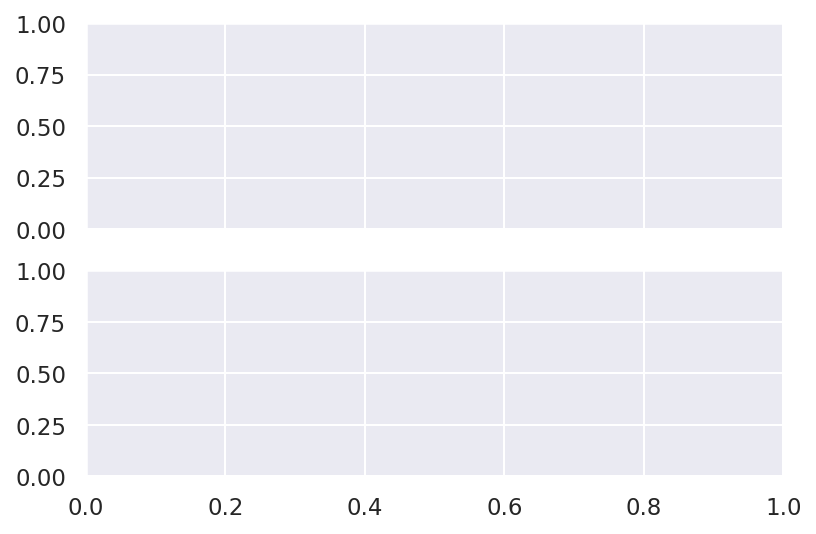

In [3]:
import seaborn as sns
sns.set()

fig,(ax1,ax2) = plt.subplots(2, 1,sharex=True, figsize=(6,4))
fig.set_dpi(150)
axes = [ax1,ax2]

linestyles = ["dotted","solid", "-"]

learners = ["MAML", "MAML_FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", "MetaSGD", "MetaCurvature",]   

labels = ["MAML", "MAML FO", "Reptile", "CAVIA", "ANIL", "KFO", "BOIL", "MetaSGD", "MetaCurv.",]   
targ_channel = "awgn"

y_min, y_max = 0.0008, 0.3

channel_hardness = ["awgn"]

offsets = np.arange(-0.3,0.6,0.1)

for i, learner in enumerate(learners):
    all_v = []
    all_std = []
    
    if learner.lower() == "boil":
        print("here")
        run_names = [
    "../pack1123/awgn_wide_" +learner.lower()+ "_15ts_5cls"+ "*json",
    "../pack0shot/awgn_wide_" +learner.lower()+ "_15ts_5cls*.json"]
    else: 
        run_names = [
    "../pack1123/awgn_wide_" +learner.lower()+ "_15ts_5cls"+ "*json",
    "../pack0shot/awgn_wide_" +learner.lower()+ "_0shot_15ts_5cls*.json"]

    for j, run_name in enumerate(run_names):
        print(run_name)

        run_name = glob.glob(run_name)
        if debug: print("glob ", run_name[0], type(run_name))
        data = load_from_json(run_name[0])


        if debug: print( data["iter"], run_name)
        value = data['val_ber_list']

        if learner is "test" or "boil":
            ep_id = -1
        else: 
            ep_id =  np.where(np.asarray(data["iter"])== total_it)[0][0] 
        if debug: print("value shape", np.shape(value), np.mean(value), " ep id ", ep_id)


        if targ_channel == "awgn":
            if debug: print(len(value))
            value = np.asarray(value[ep_id][:1050]).reshape(len(snr_list_awgn), -1)
            v_id = 10

        elif targ_channel == "bursty":
            value = np.asarray(value[ep_id][1950:]).reshape(len(snr_list_bursty), -1)
            v_id = 4

        elif targ_channel == "mem":
            value = np.asarray(value[ep_id][1050:1500]).reshape(len(snr_list_mem), -1)
            v_id = 4
#                 y_min = 0.0001
        elif targ_channel == "mp":
            value = np.asarray(value[ep_id][1500:1950]).reshape(len(snr_list_mp), -1)
            v_id = 4

        if debug: print("value shape", np.shape(value), np.mean(value[v_id]))

        all_v.append(np.mean(value[v_id]))

        all_std.append(np.std(value[v_id]))

    ls_id = 0
    print(all_v)
    # plot adapt
    eb = ax2.errorbar(offsets[i], all_v[0], yerr = all_std[0], lw=0, \
          elinewidth = 3., capsize=8.2, capthick=2, alpha = 0.9,  ecolor= colour[i], linestyle = linestyles[ls_id])
    eb[-1][0].set_linestyle(linestyles[ls_id])

    ax2.scatter(offsets[i], all_v[0],marker=markers[i], #label = legends[i],  \
                s=60, alpha=0.9,  c = colour[i])
    ax2.set_ylabel("BER \n Adapted Model")
#         plt.xticks(ticks=np.arange(-0.3, 0.5, 0.1))
    # plot zeroshot
    ls_id = 1
    eb = ax1.errorbar(offsets[i], all_v[1], yerr = all_std[1], lw=0, \
          elinewidth = 3., capsize=8.2, capthick=2, alpha = 0.9,  ecolor= colour[i], linestyle = linestyles[ls_id])
    eb[-1][0].set_linestyle(linestyles[ls_id])

    ax1.scatter(offsets[i], all_v[1],marker=markers[i], #label = legends[i],  \
                s=60, alpha=0.9,  c = colour[i])

    ax1.set_ylabel("BER \n Base Model")
    plt.setp(axes, xticks=offsets)
    plt.sca(ax2)       
    plt.xticks(ticks=offsets, labels=labels, rotation=30)

    fig.align_ylabels(axes)

    plt.yscale('log')
#         fig.tight_layout()
